In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import joblib

# Import Datasets

In [2]:
data_3 = pd.read_csv('feature_3.csv')
data_10 = pd.read_csv('feature_10.csv')
data_3 = data_3.drop(columns=['Unnamed: 0'])
data_10 = data_10.drop(columns=['Unnamed: 0'])

## Split and fit datasets to models

In [3]:
# Define features and target
X_3 = data_3.drop(columns='Visc-Ford')
y_3 = data_3['Visc-Ford']

X_10 = data_10.drop(columns='Visc-Ford')
y_10 = data_10['Visc-Ford']

#train_test_split for both datasets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_3, y_3, test_size=.2, random_state=42)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test_split(X_10, y_10, test_size=.2, random_state=42)

### Linear Regression

In [4]:
#Instantiate the models
linear_3 = LinearRegression()
linear_10 = LinearRegression()

#Fit the models on each dataset
linear_3.fit(X_train_3, y_train_3)
linear_10.fit(X_train_10, y_train_10)

#Predict and evaluate for X_3 set
y_pred_3 = linear_3.predict(X_test_3)
mse_linear_3 = mean_squared_error(y_test_3, y_pred_3).round(4)
r2_linear_3 = r2_score(y_test_3, y_pred_3).round(4)

#Predict and evalute for X_10 set
y_pred_10 = linear_10.predict(X_test_10)
mse_linear_10 = mean_squared_error(y_test_10, y_pred_10).round(4)
r2_linear_10 = r2_score(y_test_10, y_pred_10).round(4)

#Print the metrics
print('X3 set -- Mean Squared Error:', mse_linear_3)
print('X3 set -- R^2 Score:', r2_linear_3)
print('X10 set -- Mean Squared Error:', mse_linear_10)
print('X10 set -- R^2 Score:', r2_linear_10)

X3 set -- Mean Squared Error: 1.002
X3 set -- R^2 Score: -0.0762
X10 set -- Mean Squared Error: 0.9854
X10 set -- R^2 Score: -0.0583


### Support Vector Regression

In [5]:
#Instantiate the Models
svr_3 = SVR()
svr_10 = SVR()

#Fit the models to each dataset
svr_3.fit(X_train_3, y_train_3)
svr_10.fit(X_train_10, y_train_10)

#Predict and evaluate for X_3 set
svr_y3_pred = svr_3.predict(X_test_3)
mse_svr_3 = mean_squared_error(y_test_3, svr_y3_pred).round(4)
r2_svr_3 = r2_score(y_test_3, svr_y3_pred).round(4)

#Predict and evaluate for X_10 set
svr_y10_pred = svr_10.predict(X_test_10)
mse_svr_10 = mean_squared_error(y_test_10, svr_y10_pred).round(4)
r2_svr_10 = r2_score(y_test_10, svr_y10_pred).round(4)

#Print the metrics
print('X3 set -- Mean Squared Error:', mse_svr_3)
print('X3 set -- R^2 Score:', r2_svr_3)
print('X10 set -- Mean Squared Error:', mse_svr_10)
print('X10 set -- R^2 Score:', r2_svr_10)

X3 set -- Mean Squared Error: 0.9253
X3 set -- R^2 Score: 0.0062
X10 set -- Mean Squared Error: 0.921
X10 set -- R^2 Score: 0.0108


### Gradient Boosting Regression

In [6]:
#Instantiate the models
gbr_3 = GradientBoostingRegressor(random_state=42)
gbr_10 = GradientBoostingRegressor(random_state=42)

#Fit the models to each dataset
gbr_3.fit(X_train_3, y_train_3)
gbr_10.fit(X_train_10, y_train_10)

#Predict and evaluate for the X_3 set
gbr_3_pred = gbr_3.predict(X_test_3)
mse_gbr_3 = mean_squared_error(y_test_3, gbr_3_pred).round(4)
r2_gbr_3 = r2_score(y_test_3, gbr_3_pred).round(4)

#Predict and evalute for the X_10 set
gbr_10_pred = gbr_10.predict(X_test_10)
mse_gbr_10 = mean_squared_error(y_test_10, gbr_10_pred).round(4)
r2_gbr_10 = r2_score(y_test_10, gbr_10_pred).round(4)

#Print the metrics
print('X3 set -- Mean Squared Error:', mse_gbr_3)
print('X3 set -- R^2 Score:', r2_gbr_3)
print('X10 set -- Mean Squared Error:', mse_gbr_10)
print('X10 set -- R^2 Score:', r2_gbr_10)

X3 set -- Mean Squared Error: 0.8765
X3 set -- R^2 Score: 0.0586
X10 set -- Mean Squared Error: 1.1692
X10 set -- R^2 Score: -0.2558


### Neural Networks

In [7]:
#Define the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()]) 
    return model

#Train and evaluate the X3 model
model_3 = create_model(X_train_3.shape[1])
history_3 = model_3.fit(X_train_3, y_train_3, epochs=100, batch_size=32, validation_split=0.2)
loss_3, mse_3 = model_3.evaluate(X_test_3, y_test_3)

#Predictions for X3 dataset
y_pred_3 = model_3.predict(X_test_3)
r2_3 = r2_score(y_test_3, y_pred_3).round(4)

#Train and evaluate the X10 model
model_10 = create_model(X_train_10.shape[1])
history_10 = model_10.fit(X_train_10, y_train_10, epochs=100, batch_size=32, validation_split=0.2)
loss_10, mse_10 = model_10.evaluate(X_test_10, y_test_10)

#Predictions for X10 dataset
y_pred_10 = model_10.predict(X_test_10)
r2_10 = r2_score(y_test_10, y_pred_10).round(4)

#Round MSE
mse_3 = round(mse_3, 4)
mse_10 = round(mse_10, 4)

#Print the metrics
print(f"X3 set -- MSE: {mse_3}, R2 Score: {r2_3}")
print(f"X10 set -- MSE: {mse_10}, R2 Score: {r2_10}")

Epoch 1/100


/Users/uthscbcm/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 72316.1406 - root_mean_squared_error: 267.6693 - val_loss: 1189.0701 - val_root_mean_squared_error: 34.4829
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 17571.6426 - root_mean_squared_error: 132.1704 - val_loss: 249.9860 - val_root_mean_squared_error: 15.8109
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 7521.2856 - root_mean_squared_error: 86.2188 - val_loss: 49.4043 - val_root_mean_squared_error: 7.0288
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 2877.9270 - root_mean_squared_error: 53.6110 - val_loss: 8.3057 - val_root_mean_squared_error: 2.8820
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 1528.2434 - root_mean_squared_error: 39.0839 - val_loss: 3.0719 - val_root_mean_squared_error: 1.7527
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 1029.0012 - root_mean_squared_error: 32.0401 - val_loss: 8.4715 - val_root_mean_squared_error: 2.9106
Epoch 7/100
45/45 ━━━━━━

Epoch 43/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step - loss: 34.2947 - root_mean_squared_error: 5.8465 - val_loss: 1.5427 - val_root_mean_squared_error: 1.2421
Epoch 44/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 42.0427 - root_mean_squared_error: 6.4593 - val_loss: 4.9497 - val_root_mean_squared_error: 2.2248
Epoch 45/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - loss: 38.1412 - root_mean_squared_error: 6.1564 - val_loss: 3.0946 - val_root_mean_squared_error: 1.7591
Epoch 46/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 466us/step - loss: 32.3982 - root_mean_squared_error: 5.6860 - val_loss: 3.6527 - val_root_mean_squared_error: 1.9112
Epoch 47/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 28.4829 - root_mean_squared_error: 5.3316 - val_loss: 3.5170 - val_root_mean_squared_error: 1.8754
Epoch 48/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - loss: 33.0019 - root_mean_squared_error: 5.7166 - val_loss: 5.5447 - val_root_mean_squared_error: 2.3547
Epoch 49/100
45/45 ━━━━━━━━━━━━━━━

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 17.5913 - root_mean_squared_error: 4.1915 - val_loss: 1.4285 - val_root_mean_squared_error: 1.1952
Epoch 86/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - loss: 17.8241 - root_mean_squared_error: 4.2186 - val_loss: 1.7341 - val_root_mean_squared_error: 1.3168
Epoch 87/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 485us/step - loss: 18.5121 - root_mean_squared_error: 4.2999 - val_loss: 1.8230 - val_root_mean_squared_error: 1.3502
Epoch 88/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - loss: 16.9693 - root_mean_squared_error: 4.1135 - val_loss: 2.0924 - val_root_mean_squared_error: 1.4465
Epoch 89/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 20.5211 - root_mean_squared_error: 4.5200 - val_loss: 2.2065 - val_root_mean_squared_error: 1.4854
Epoch 90/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - loss: 19.0473 - root_mean_squared_error: 4.3609 - val_loss: 1.6012 - val_root_mean_squared_error: 1.2654
Epoch 91/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 493u

/Users/uthscbcm/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47379.8164 - root_mean_squared_error: 215.6855 - val_loss: 1281.6213 - val_root_mean_squared_error: 35.7997
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 8973.8301 - root_mean_squared_error: 94.2644 - val_loss: 427.2972 - val_root_mean_squared_error: 20.6712
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 472us/step - loss: 3692.1790 - root_mean_squared_error: 60.4971 - val_loss: 139.9960 - val_root_mean_squared_error: 11.8320
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 473us/step - loss: 1744.2151 - root_mean_squared_error: 41.7449 - val_loss: 16.1446 - val_root_mean_squared_error: 4.0180
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 464us/step - loss: 1085.0938 - root_mean_squared_error: 32.9227 - val_loss: 17.8009 - val_root_mean_squared_error: 4.2191
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 694.0006 - root_mean_squared_error: 26.3321 - val_loss: 2.8876 - val_root_mean_squared_error: 1.6993
Epoch 7/100
45/45 ━━━━━

Epoch 43/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 38.6877 - root_mean_squared_error: 6.2143 - val_loss: 20.0992 - val_root_mean_squared_error: 4.4832
Epoch 44/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - loss: 40.1219 - root_mean_squared_error: 6.3291 - val_loss: 14.5521 - val_root_mean_squared_error: 3.8147
Epoch 45/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - loss: 36.2080 - root_mean_squared_error: 6.0151 - val_loss: 12.9604 - val_root_mean_squared_error: 3.6001
Epoch 46/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 37.8654 - root_mean_squared_error: 6.1478 - val_loss: 12.6177 - val_root_mean_squared_error: 3.5521
Epoch 47/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - loss: 32.2751 - root_mean_squared_error: 5.6792 - val_loss: 16.9235 - val_root_mean_squared_error: 4.1138
Epoch 48/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - loss: 33.4109 - root_mean_squared_error: 5.7765 - val_loss: 11.8222 - val_root_mean_squared_error: 3.4383
Epoch 49/100
45/45 ━━━━━━━━━

Epoch 85/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - loss: 25.7805 - root_mean_squared_error: 5.0747 - val_loss: 3.6706 - val_root_mean_squared_error: 1.9159
Epoch 86/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - loss: 25.0934 - root_mean_squared_error: 5.0071 - val_loss: 2.8497 - val_root_mean_squared_error: 1.6881
Epoch 87/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 23.5107 - root_mean_squared_error: 4.8476 - val_loss: 5.7184 - val_root_mean_squared_error: 2.3913
Epoch 88/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - loss: 23.0291 - root_mean_squared_error: 4.7979 - val_loss: 2.6630 - val_root_mean_squared_error: 1.6319
Epoch 89/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - loss: 23.0671 - root_mean_squared_error: 4.7998 - val_loss: 8.4367 - val_root_mean_squared_error: 2.9046
Epoch 90/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - loss: 22.8544 - root_mean_squared_error: 4.7801 - val_loss: 5.1454 - val_root_mean_squared_error: 2.2683
Epoch 91/100
45/45 ━━━━━━━━━━━━━━━

### K Nearest Neighbors

In [8]:
#Instantiate the models
knn_model_3 = KNeighborsRegressor(n_neighbors=3)
knn_model_10 = KNeighborsRegressor(n_neighbors=3)

#Fit the models to the datasets
knn_model_3.fit(X_train_3, y_train_3)
knn_model_10.fit(X_train_10, y_train_10)

#Predict and evaluate for the X3 dataset
knn_pred_3 = knn_model_3.predict(X_test_3)
mse_knn_3 = mean_squared_error(y_test_3, knn_pred_3).round(4)
r2_knn_3 = r2_score(y_test_3, knn_pred_3).round(4)

#Predict and evaluate for the X10 dataset
knn_pred_10 = knn_model_10.predict(X_test_10)
mse_knn_10 = mean_squared_error(y_test_10, knn_pred_10).round(4)
r2_knn_10 = r2_score(y_test_10, knn_pred_10).round(4)

#Print the scores
print('X3 set -- Mean Squared Error:', mse_knn_3)
print('X3 set -- R^2 Score:', r2_knn_3)
print('X10 set -- Mean Squared Error:', mse_knn_10)
print('X10 set -- R^2 Score:', r2_knn_10)

X3 set -- Mean Squared Error: 1.3859
X3 set -- R^2 Score: -0.4885
X10 set -- Mean Squared Error: 1.1899
X10 set -- R^2 Score: -0.278


# Evaluate the Models

To evaluate the models against one another, I will compile the models into a single dataframe and visualize the results with a scatterplot.

In [9]:
#Linear Regression Metrics
lr_metrics = {
    'Model': ['LR_X3', 'LR_X10'],
    'MSE': [mse_linear_3, mse_linear_10],
    'R2': [r2_linear_3, r2_linear_10]}

#Support Vector Regression Metrics
svr_metrics = {
    'Model': ['SVR_X3', 'SVR_X10'],
    'MSE': [mse_svr_3, mse_svr_10],
    'R2': [r2_svr_3, r2_svr_10]}

#Gradient Boosting Regression Metrics
gbr_metrics = {
    'Model': ['GBR_X3', 'GBR_X10'],
    'MSE': [mse_gbr_3, mse_gbr_10],
    'R2': [r2_gbr_3, r2_gbr_10]}

#Neural Network Metrics
neural_metrics = {
    'Model': ['Neural_X3', 'Neural_X10'],
    'MSE': [mse_3, mse_10],
    'R2': [r2_3, r2_10]}

#K Nearest Neighbors Metrics
knn_metrics = {
    'Model': ['KNN_X3', 'KNN_X10'],
    'MSE': [mse_knn_3, mse_knn_10],
    'R2': [r2_knn_3, r2_knn_10]}

#Convert dictionaries to DataFrames
lr_df = pd.DataFrame(lr_metrics)
svr_df = pd.DataFrame(svr_metrics)
gbr_df = pd.DataFrame(gbr_metrics)
neural_df = pd.DataFrame(neural_metrics)
knn_df = pd.DataFrame(knn_metrics)

#Combine into single dataframe
all_metrics = pd.concat([lr_df, svr_df, gbr_df, neural_df, knn_df], ignore_index=True)
all_metrics

,Model,MSE,R2
0,LR_X3,1.0020,-0.0762
1,LR_X10,0.9854,-0.0583
2,SVR_X3,0.9253,0.0062
3,SVR_X10,0.9210,0.0108
4,GBR_X3,0.8765,0.0586
5,GBR_X10,1.1692,-0.2558
6,Neural_X3,1.7344,-2.2307
7,Neural_X10,2.3003,-4.6828
8,KNN_X3,1.3859,-0.4885
9,KNN_X10,1.1899,-0.2780


Before we plot the models, we will filter out any models where the R2 score was < 0 because these R2 scores perform worse than the mean of the data.

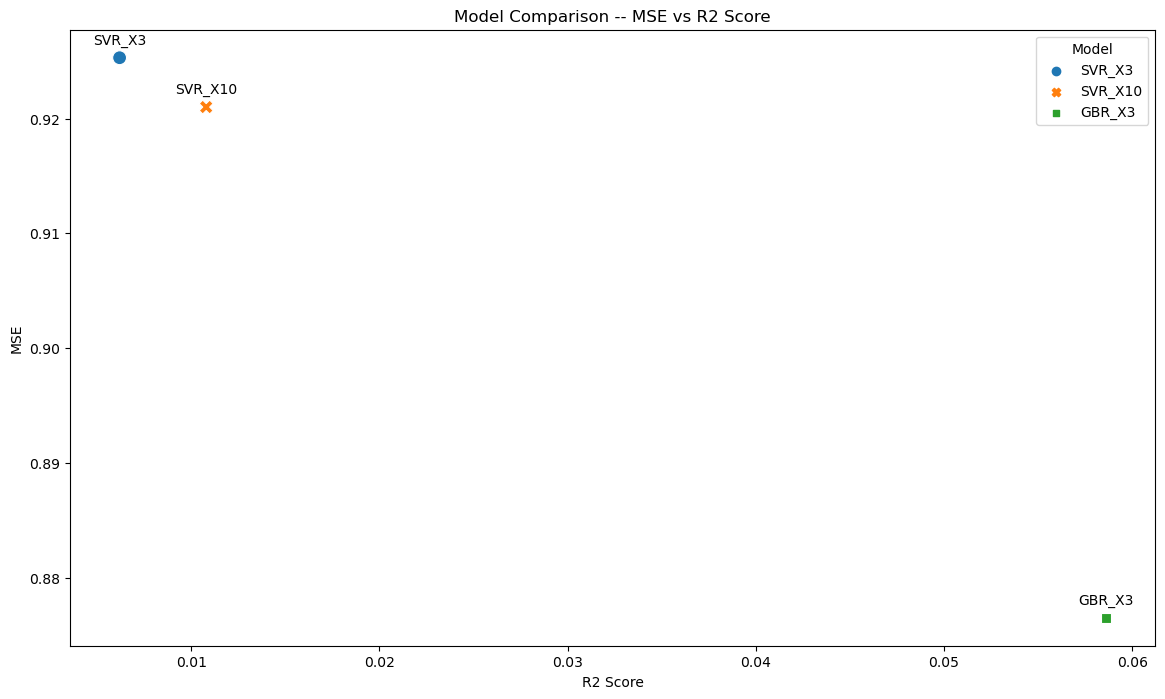

In [10]:
#Filter the models
filtered_models = all_metrics[all_metrics['R2'] >= 0]

#Plot
plt.figure(figsize=(14, 8))

#Create scatterplot
sns.scatterplot(data=filtered_models, x='R2', y='MSE', hue='Model', style='Model', s=100)

#Add labels and title
plt.xlabel('R2 Score')
plt.ylabel('MSE')
plt.title('Model Comparison -- MSE vs R2 Score')

#Annotate each point with the model name
for i, row in all_metrics.iterrows():
    plt.annotate(row['Model'], (row['R2'], row['MSE']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

The Gradient Boosting Regression Model performed better than the Support Vector Regression models. Going forward, I will utilize the GBR_X3 model.

# Export the GBR3 Model & Train/Test Data

In [11]:
joblib.dump(gbr_3, 'gbr_x3_model.pkl')

X_train_3.to_csv('X_train_3.csv') 
X_test_3.to_csv('X_test_3.csv') 
y_train_3.to_csv('y_train_3.csv')
y_test_3.to_csv('y_test_3.csv')

In [12]:
import os

print(os.getcwd())

/Users/uthscbcm/Documents/Eastern/Project_Files


In [13]:
print(os.listdir(os.getcwd()))

['cleaned_data', 'feature_3.csv', 'X_train_3.csv', 'X_test_3.csv', '.DS_Store', 'merged_dataset', '1-- Import and Clean Initial Data-checkpoint.ipynb', 'weather_data.csv', 'gbr_x3_model.pkl', '3-- Descriptive Statistics and Visualizations-checkpoint.ipynb', 'gpr_model.pkl', 'Production.csv', '4 -- Feature Selection & Preprocessing-checkpoint.ipynb', 'feature_10.csv', '6-- Hyperparamter Tuning & Gaussian Processes.ipynb', 'static', 'preprocessing_pipeline.pkl', 'y_train_3.csv', 'y_test_3.csv', 'templates', '.ipynb_checkpoints', 'Production.numbers', '5 -- Initial Model Training and Evaluation.ipynb', 'web_model.py', 'myenv', 'gbr_model.pkl', '2-- Add Weather Data-checkpoint.ipynb']
